# Instructional Set - Plotting with matplotlib and pandas

_Sources include: [Research Computing](http://nbviewer.ipython.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_17_matplotlib.ipynb), [Harvard CS109](http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_03_statistical_graphs.ipynb),[Chris Fonnesbeck](http://nbviewer.ipython.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb) and the [MatPlotLib documentation](http://nbviewer.ipython.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_17_matplotlib.ipynb)_

## What we will cover: 

* Plotting with Pandas
  * Line Plots
  * Bar Plots
  * Histograms
  * Subplots
  
* Plotting with MatPlotLib
  * Syntax - basic plots and subplots
  * Scatter Plots


##Built-in Plotting Functionality with Pandas

* Pandas plotting is built with Matplotlib
* Pandas dataframes already include row and column label and grouping, so allow for more concise plotting statements.

In [1]:
%matplotlib inline

In [4]:
from pandas import *

In [ ]:
# Subplotting example
a = randn(50).cumsum()
b = randn(50).cumsum()
c = randn(50).cumsum()


In [ ]:
df=DataFrame({'a':a,'b':b,'c':c})

In [ ]:
df.plot(subplots=True)

In [ ]:
df.plot()

In [ ]:
# Adding options
#Generate a random graph 
a = randn(50).cumsum()

In [ ]:
df = DataFrame(a) # convert it to a dataframe

In [ ]:
df.plot(title='Random Plot',kind='line')

In [ ]:
# Pandas data frames have a built in plot function with defaults:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
columns=['A', 'B', 'C', 'D'],
index=np.arange(0, 100, 10))

In [ ]:
df

In [2]:
df.plot(title='Plot automatically finds Indexes and Places Labels')

NameError: name 'df' is not defined

###Bar plots

In [47]:
titanic = read_csv("data/titanic.csv")

In [ ]:
titanic

In [ ]:
SurvivedByClass=titanic.groupby('pclass').survived.sum()

In [ ]:
SurvivedByClass

In [ ]:
SurvivedByClass.plot(kind='bar',title='Titanic Survivors by Class')

In [ ]:
# Combine multiple groups and plot
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh',title='Titanic Survivors by Class and Gender')

In [ ]:
# Plot CrossTabs
death_counts = crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))

In [ ]:
death_counts.plot(kind='bar', stacked=True, title='Passenger Outcomes by Gender and Class', color=['white','blue'], grid=False)

###Histograms and Density Plots

In [3]:
# Histogram of a particular column
titanic.fare.hist(grid=False,bins=25,range=(0,100))

NameError: name 'titanic' is not defined

In [ ]:
# Density plot -- Estimate the 'true' distribution
titanic.fare.dropna().plot(kind='kde', xlim=(0,100))

In [ ]:
titanic.fare.hist(bins=25, normed=True, color='lightseagreen')

In [ ]:
titanic.fare.plot(kind='kde', xlim=(0,600), style='r--')

In [ ]:
titanic.boxplot(column='fare',by='pclass',grid=False)

In [ ]:
# Combine pandas plots by running them together -- if pandas thinks they can be overlapped, it will
titanic.fare.hist(bins=25, normed=True, color='lightseagreen')
titanic.fare.plot(kind='kde', xlim=(0,100), style='r--')
titanic.boxplot(column='fare',by='pclass',grid=False)

## Matplotlib

### Figures and Subplots

In [2]:
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(50)
y = np.random.randn(50)
plt.scatter(x,y)


In [ ]:
%pylab inline

In [ ]:
#Single Plot
a = randn(50).cumsum()

plt.plot(a, color='red')

In [ ]:
fig = figure()

# Two rows, one column, first plot
ax1 = fig.add_subplot(2,1,1)
ax1.plot(a, color='red')

#Two rows, one column, second plot
ax2 = fig.add_subplot(2,1,2)
ax2.scatter(np.arange(50), randn(50))

# Exercise: Try 1 row, two columns
# Exercise: Try 1 row, one column

*fig* is the :class:`matplotlib.figure.Figure` object
    
*ax* can be either a single axis object or an array of axis
objects if more than one subplot was created.  The dimensions
of the resulting array can be controlled with the squeeze
keyword, see above.
    

In [ ]:
fig, ax = plt.subplots(2,3)

ax[0,1].plot(randn(50), color='green', linestyle='-')
ax[1,2].scatter(np.arange(50), randn(50), color='red')
ax[1,0].hist(randn(1000))
plt.show() #Similar to print()



In [ ]:

# Exercise: Swap the top row and bottom row plots
# Excecise: Change the line style to dotted and add circles as markers 
# Exercise: change the bins to 100 for the histogram

###Ticks, Labels and Legends

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one') 
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.set_title('Three random lines')
ax.legend(loc='best')
plt.show()

#Exercise: Change the color and line style of each line using the minimum amount of characters


In [3]:
# Save the file
plt.savefig('ThreeRandomLines.pdf')

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd

In [ ]:
### ScatterPlots from Data Frames

In [13]:
# Combine pandas with matplotlib for scatterplots
baseball = pd.read_csv("data/baseball-s.csv")
#Offensive Statistics from MLB -- 2008.  Glossary: http://www.baseballprospectus.com/glossary/index.php?context=all&category=true

baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2,1,1,4,4,0,0,3,0,0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0,0,0,0,1,0,0,0,0,0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0,0,0,0,2,0,0,0,0,0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0,0,0,0,4,0,0,0,0,0


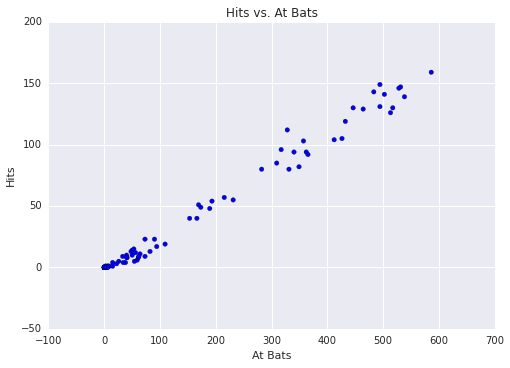

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.set_title("Hits vs. At Bats")
ax.set_xlabel("At Bats")
ax.set_ylabel("Hits")
ax.scatter(baseball.ab, baseball.h) 


(0, 200)

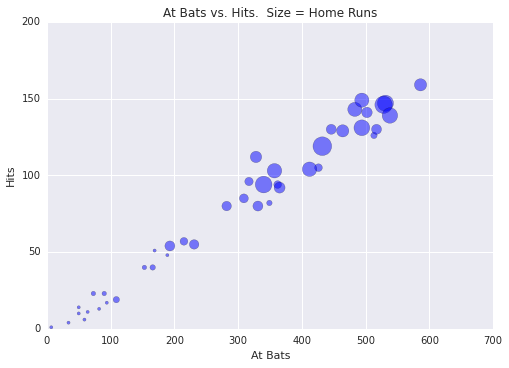

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.set_title("At Bats vs. Hits.  Size = Home Runs")
ax.set_xlabel("At Bats")
ax.set_ylabel("Hits")
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

In [ ]:
baseball

(0, 200)

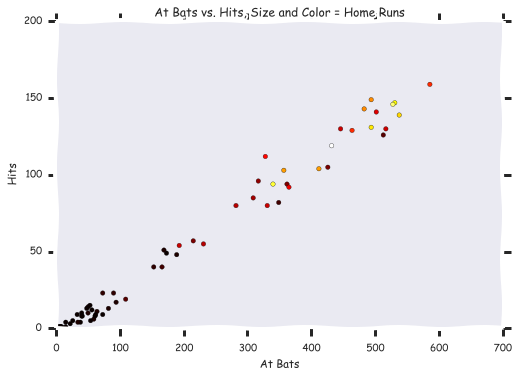

In [18]:
plt.xkcd()
#plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.set_title("At Bats vs. Hits, Size and Color = Home Runs")
ax.set_xlabel("At Bats")
ax.set_ylabel("Hits")
plt.scatter(baseball.ab, baseball.h, c=baseball.hr,cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200)

## Other Packages

### Seaborn

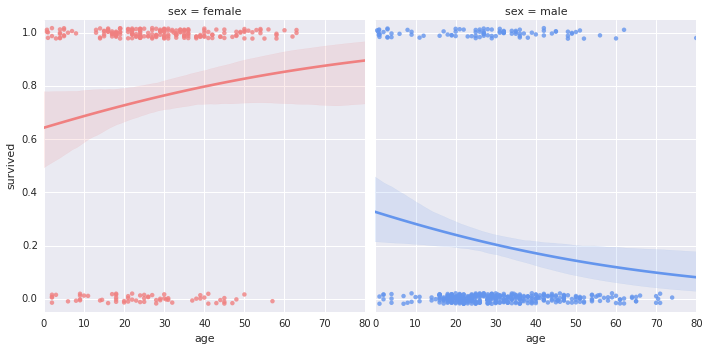

In [10]:
#With Titanic Data
import seaborn as sns
sns.set(style="darkgrid")

df = sns.load_dataset("titanic")

pal = dict(male="#6495ED", female="#F08080")
g = sns.lmplot("age", "survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

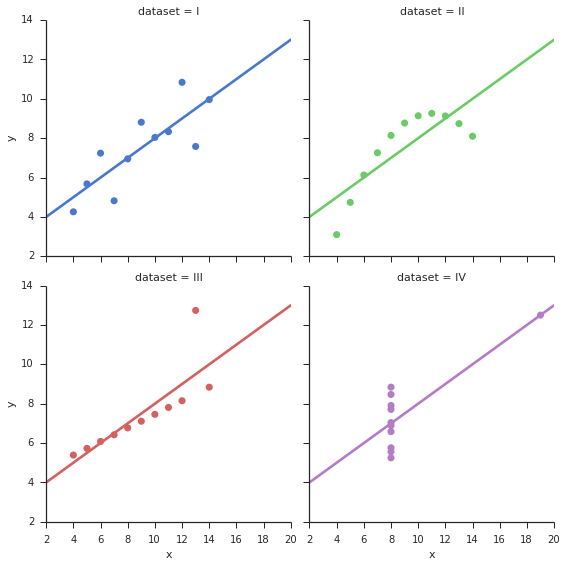

In [11]:
# Seaborn with Anscombe Data
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("anscombe")
sns.lmplot("x", "y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

#### Other packages

vincent: wraps vega and is built on d3 -- javascript capabilities
bokeh: Interactive plots (javascript)
ggplot: (similar to R ggplot)





## Practice

If one of your group has a datset for your independent assignment:

Create a plot of some features of the dataset, include title, axes labels
* Include titles and axes labels
* Include multiple variables, either on different or one one chart.
* Include data subsets

Or: Using Titanic, Baseball, or one of these [example datasets](http://vincentarelbundock.github.io/Rdatasets/datasets.html), ask a question that can be answered through visualization, and create the graph that provides the answer.
* Include titles and axes labels
* Include multiple variables, either on different or one one chart.
* Include data subsets

At the end of the period, we will go over two of the works in progress, and discuss ways of creating or improving the plots


BONUS: Load Anscombe's Quartet and Create a Grid with a Scatter and Line Graph of Each
[Anscombe's Quartet Data](http://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv)

